In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [147]:
path = "../EmployeeAtrrition/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)

In [148]:
cols_drop = ['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'MonthlyIncome',
            'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']

In [149]:
df_clean = df.drop(columns= cols_drop)

In [150]:
# Move 'col_c' to the first position (index 0)
column_to_move = df_clean.pop('Attrition')  # Remove the column
df_clean.insert(len(df_clean.columns), 'Attrition', column_to_move)

In [151]:
df_clean.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'Attrition'],
      dtype='object')

In [152]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [153]:
train_df, test_df = train_test_split(df_clean,test_size = 0.2, random_state = 42, stratify = df_clean['Attrition'])

In [154]:
train_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attrition
1194,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,47,...,No,14,3,3,3,2,3,3,1,No
128,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,100,...,No,14,3,3,1,2,3,2,2,No
810,46,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,52,...,No,12,3,4,1,3,3,12,4,No
478,25,Travel_Rarely,622,Sales,13,1,Medical,2,Male,40,...,No,11,3,3,0,1,3,7,0,No
491,43,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,72,...,Yes,13,3,2,1,3,3,8,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,Travel_Rarely,427,Sales,7,3,Life Sciences,3,Male,99,...,Yes,21,4,2,1,2,3,3,0,Yes
963,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,2,Female,31,...,No,15,3,4,1,3,3,7,1,No
734,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,2,Male,94,...,No,15,3,1,1,3,2,4,1,No
1315,36,Travel_Rarely,430,Research & Development,2,4,Other,4,Female,73,...,Yes,22,4,4,1,2,3,1,0,No


In [155]:
# Identifying categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [156]:
train_df_onehot = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df_onehot = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

In [157]:
scaler = MinMaxScaler()
train_scaled = train_df_onehot.copy()
train_scaled[numerical_cols] = scaler.fit_transform(train_df_onehot[numerical_cols])
test_scaled = test_df_onehot.copy()
test_scaled[numerical_cols] = scaler.transform(test_df_onehot[numerical_cols])

In [158]:
test_df_onehot['Attrition_Yes'] = test_df_onehot['Attrition_Yes'].astype(int)
train_df_onehot['Attrition_Yes'] = train_df_onehot['Attrition_Yes'].astype(int)
test_scaled['Attrition_Yes'] = test_scaled['Attrition_Yes'].astype(int)
train_scaled['Attrition_Yes'] = train_scaled['Attrition_Yes'].astype(int)

In [159]:
K_range = range(2, 10)
inertia_values = []
silhouette_scores = []

In [160]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=7, n_init=10)
    cluster_labels = kmeans.fit_predict(train_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(train_scaled, cluster_labels))

Text(0.5, 1.0, 'Elbow Method: Optimal K')

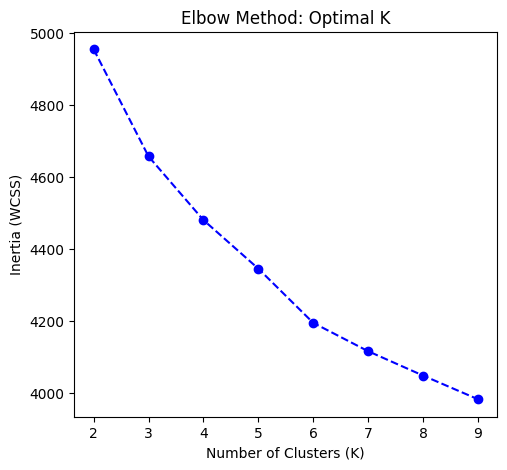

In [161]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method: Optimal K")

In [162]:
kmeans = KMeans(n_clusters=5, random_state=7, n_init=10)
train_clusters = kmeans.fit_predict(train_scaled)
test_clusters = kmeans.predict(test_scaled)

In [163]:
centroids = kmeans.cluster_centers_

In [164]:
num_feature_indices = [train_scaled.columns.get_loc(col) for col in numerical_cols]
centroids_numerical = centroids[:, num_feature_indices] # type: ignore

In [165]:
centroids_original = scaler.inverse_transform(centroids_numerical)

In [166]:
train_df_onehot['Cluster'] = train_clusters
test_df_onehot['Cluster'] = test_clusters

In [ ]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)
centroids_pca = pca.transform(centroids) 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


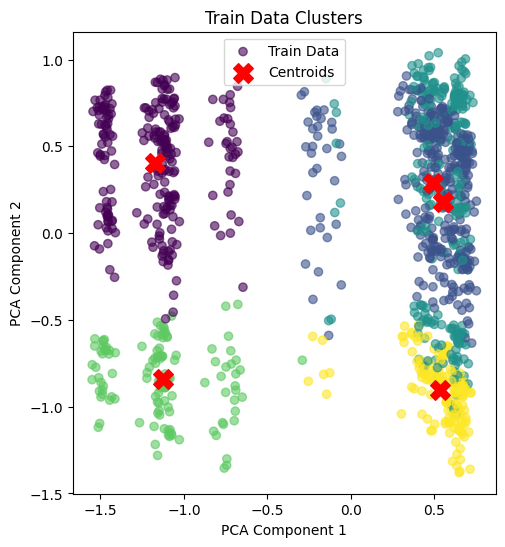

In [168]:
plt.figure(figsize=(12, 6))
# train clusters
plt.subplot(1, 2, 1)
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_clusters, cmap='viridis', alpha=0.6, label="Train Data")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Train Data Clusters")
legend = plt.legend()

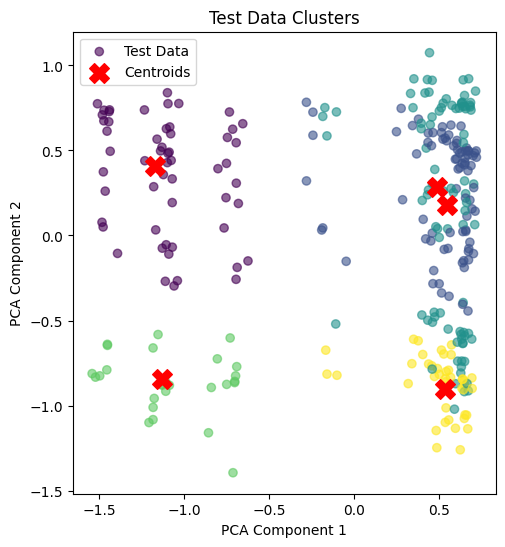

In [169]:
plt.figure(figsize=(12, 6))
# test clusters
plt.subplot(1, 2, 2)
plt.scatter(test_pca[:, 0], test_pca[:, 1], c=test_clusters, cmap='viridis', alpha=0.6, label="Test Data")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Test Data Clusters")
legend = plt.legend()

In [170]:
train_silhouette = silhouette_score(train_scaled, train_clusters)
test_silhouette = silhouette_score(test_scaled, test_clusters)

print(f"\nEvaluation Results")
print(f" Train Silhouette Score: {train_silhouette:.3f}")
print(f" Test Silhouette Score: {test_silhouette:.3f}")


Evaluation Results
 Train Silhouette Score: 0.085
 Test Silhouette Score: 0.086


The scores are close to each eather. So clustering is good both for the train and test data.

In [171]:
# Fit KMeans clustering on the scaled training data using only numerical columns
kmeans = KMeans(n_clusters=5, random_state=7, n_init=10)
train_scaled['Cluster'] = kmeans.fit_predict(train_scaled[numerical_cols])

# Calculate the mean of each feature for every cluster (cluster summary)
cluster_summary = train_scaled.groupby('Cluster').mean()

# Get the cluster centroids in scaled space
centroids = kmeans.cluster_centers_

# Extract only the numerical feature centroids
centroids_numerical = centroids[:, :len(numerical_cols)]

# Convert centroids back to original scale using the scaler
centroids_original = scaler.inverse_transform(centroids_numerical)

# Create a DataFrame for centroids in original scale and add cluster labels
centroid_df = pd.DataFrame(centroids_original, columns=numerical_cols)
centroid_df['Cluster'] = range(len(centroid_df))

# Print cluster summary statistics
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
              Age  DailyRate  DistanceFromHome  Education  \
Cluster                                                     
0        0.449173   0.513874          0.266469   0.494819   
1        0.439033   0.495748          0.285579   0.450758   
2        0.445392   0.531900          0.291809   0.469283   
3        0.467991   0.466285          0.332098   0.502075   
4        0.465251   0.498614          0.317181   0.472973   

         EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Cluster                                                                  
0                       0.122625    0.508364        0.585492  0.255181   
1                       0.573232    0.513528        0.560606  0.288826   
2                       0.862344    0.472550        0.587031  0.253413   
3                       0.603043    0.544873        0.605809  0.276971   
4                       0.540541    0.502394        0.551351  0.270270   

         JobSatisfaction  MonthlyRat

In [172]:
# Print cluster centroids in original scale
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
         Age   DailyRate  DistanceFromHome  Education  \
0  36.865285  820.367876          8.461140   2.979275   
1  36.439394  795.064394          8.996212   2.803030   
2  36.706485  845.532423          9.170648   2.877133   
3  37.655602  753.933610         10.298755   3.008299   
4  37.540541  799.064865          9.881081   2.891892   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                 1.367876   65.585492        2.756477  2.020725   
1                 2.719697   65.946970        2.681818  2.155303   
2                 3.587031   63.078498        2.761092  2.013652   
3                 2.809129   68.141079        2.817427  2.107884   
4                 2.621622   65.167568        2.654054  2.081081   

   JobSatisfaction   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0         3.305699  14158.803109            2.668394          14.036269   
1         2.795455  14869.795455            2.215909          14.117424   
2   

## Cluster Analysis and Attrition Insights

### Cluster 0
- **Profile:**  
  - Low environment satisfaction (0.12).  
  - Moderate job satisfaction (0.77).  
  - Medium job involvement (0.59).  
  - Overtime: 24%.  
- **Attrition Rate:** ~18.7%.  
- **Insight:** Employees are unhappy with their work environment despite moderate job satisfaction. Attrition risk is high due to poor satisfaction scores.

---

### Cluster 1
- **Profile:**  
  - Moderate environment satisfaction (0.57).  
  - Job satisfaction is average (0.60).  
  - Overtime: 26%.  
  - Slightly higher proportion of married employees.  
- **Attrition Rate:** ~16.7%.  
- **Insight:** Employees here are moderately satisfied and engaged, but overtime is still high. Attrition is lower than Cluster 0, but still notable.

---

### Cluster 2
- **Profile:**  
  - Very high environment satisfaction (0.86).  
  - High job satisfaction (0.80).  
  - Strong job involvement (0.59).  
  - Lowest overtime (0.33).  
- **Attrition Rate:** ~11.6% (lowest).  
- **Insight:** This is the most stable cluster. Employees are satisfied and engaged with relatively healthy work-life balance. Low attrition risk.

---

### Cluster 3
- **Profile:**  
  - High environment satisfaction (0.60).  
  - Very low job satisfaction (0.09).  
  - High job involvement (0.61).  
  - Overtime: 30%.  
- **Attrition Rate:** ~18.7% (highest, tied with Cluster 0).  
- **Insight:** Despite good environment satisfaction, job satisfaction is extremely low. High overtime compounds the risk. This group is disengaged and at high risk.

---

### Cluster 4
- **Profile:**  
  - Moderate environment satisfaction (0.54).  
  - Job satisfaction average (0.59).  
  - Overtime: 30%.  
  - Slightly higher proportion of managers.  
- **Attrition Rate:** ~16.8%.  
- **Insight:** Middle-of-the-road group: moderate satisfaction, high overtime. Attrition is moderate but still significant.

# Logistic Regression

In [173]:
# Encode categorical columns
def encode_categorical(df, target_column='Attrition'):
    # Select categorical columns, excluding the target column
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = categorical_columns[categorical_columns != target_column]
    numerical_columns = df.select_dtypes(include=['int64']).columns
    numerical_columns = numerical_columns[numerical_columns != "Cluster"]

    # Scale numerical data
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # Make dummy variables
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    # Encode Attrition Col
    df_encoded[target_column] = df[target_column].map({'No': 0, 'Yes': 1})

    df_encoded = df_encoded.astype(int)

    return df_encoded

In [174]:
train_df2 = encode_categorical(train_df)

In [175]:
X = train_df2.drop('Attrition', axis=1)
y = train_df2['Attrition']

In [176]:
smote = SMOTE(random_state=7)
X_resampled, y_resampled = smote.fit_resample(X, y)   #type: ignore

# Join data back
train_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled_df['Attrition'] = y_resampled

# Split for cross-validation set
train_df_encoded, cv_df_encoded = train_test_split(train_resampled_df,
                                             test_size=0.2,
                                             random_state=7,
                                             stratify=train_resampled_df['Attrition'])

print(f"Original class distribution in the full dataset: {y.value_counts()}")
print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")    #type: ignore

Original class distribution in the full dataset: Attrition
0    986
1    190
Name: count, dtype: int64
Resampled class distribution: Attrition
0    986
1    986
Name: count, dtype: int64


In [177]:
# Encode test data (train and cv already encoded during SMOTE)
test_df_encoded = encode_categorical(test_df)

# Align the columns of cv_df and test_df with train_df
cv_df_encoded = cv_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)
test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)

In [178]:
from sklearn.linear_model import LogisticRegression

# Prepare features and target for training
X_train = train_df_encoded.drop('Attrition', axis=1)
y_train = train_df_encoded['Attrition']

# Initialize and fit logistic regression
logreg = LogisticRegression(max_iter=10000, random_state=7)
logreg.fit(X_train, y_train)

# Print training accuracy
train_accuracy = logreg.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.8320


In [179]:
# Prepare features and target for test data
X_test = test_df_encoded.drop('Attrition', axis=1)
y_test = test_df_encoded['Attrition']

# Predict and evaluate
test_accuracy = logreg.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7619


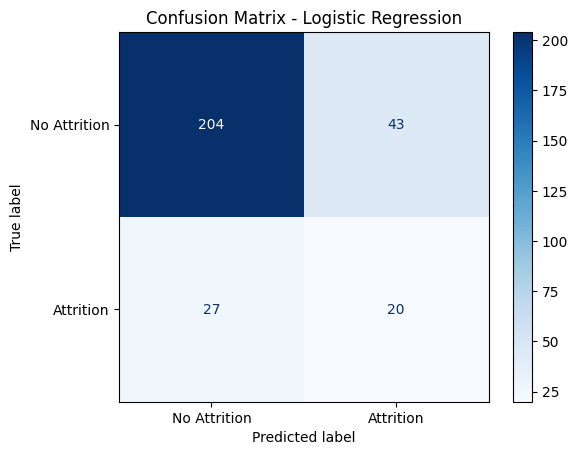

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels using the trained logistic regression model
y_pred_logreg = logreg.predict(X_test)

# Compute confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["No Attrition", "Attrition"])
disp_logreg.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [181]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score for logistic regression
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
print(f"Logistic Regression AUC Score: {auc_logreg:.4f}")

Logistic Regression AUC Score: 0.6257


# Decision Tree

In [182]:
# Factorize all categorical/object/bool/category columns EXCEPT 'Attrition'
for col in df_clean.select_dtypes(include=['object','bool','category']).columns:
    if col != "Attrition":   # skip 'Attrition' for special handling
        df_clean[col], _ = pd.factorize(df_clean[col])

# Map Attrition column separately
df_clean["Attrition"] = df_clean["Attrition"].map({"Yes": 1, "No": 0})

In [183]:
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [184]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree on training data
dtree = DecisionTreeClassifier(random_state=7)
dtree.fit(X_train, y_train)

# Training accuracy
dt_train_accuracy = dtree.score(X_train, y_train)
print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.4f}")

# Test accuracy
dt_test_accuracy = dtree.score(X_test, y_test)
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")

Decision Tree Training Accuracy: 1.0000
Decision Tree Test Accuracy: 0.7551


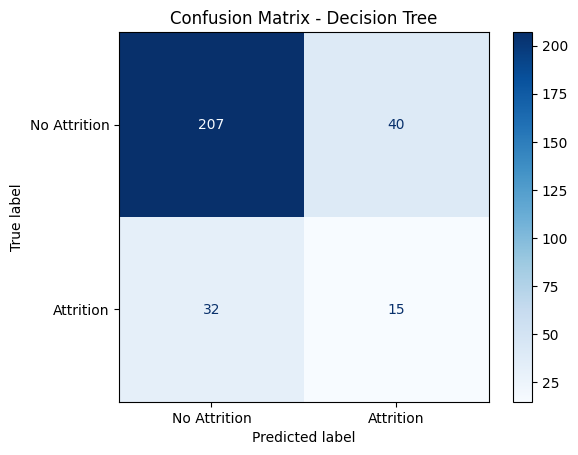

In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels using the trained decision tree model
y_pred_dtree = dtree.predict(X_test)

# Compute confusion matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot confusion matrix
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels=["No Attrition", "Attrition"])
disp_dtree.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [186]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score for decision tree
auc_dtree = roc_auc_score(y_test, y_pred_dtree)
print(f"Decision Tree AUC Score: {auc_dtree:.4f}")

Decision Tree AUC Score: 0.5786


# Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on training data
rf = RandomForestClassifier(random_state=7, n_estimators=100)
rf.fit(X_train, y_train)

# Training accuracy
rf_train_accuracy = rf.score(X_train, y_train)
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")

# Test accuracy
rf_test_accuracy = rf.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.8503


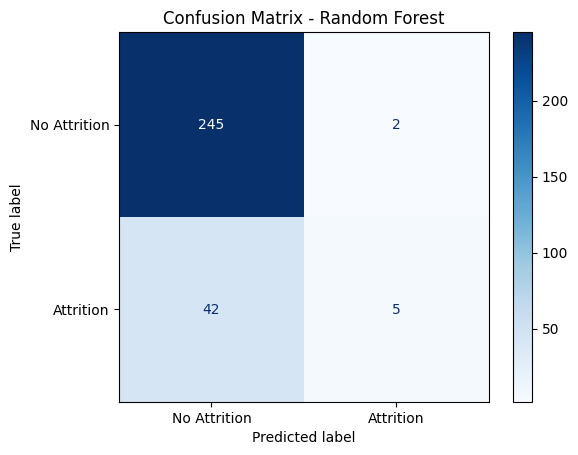

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels using the trained random forest model
y_pred_rf = rf.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Attrition", "Attrition"])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [189]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score for random forest
auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest AUC Score: {auc_rf:.4f}")

Random Forest AUC Score: 0.5491


# XGBoost

In [190]:
# Prepare features and target for XGBoost
X_train_xgb = train_df_encoded.drop('Attrition', axis=1)
y_train_xgb = train_df_encoded['Attrition']
X_test_xgb = test_df_encoded.drop('Attrition', axis=1)
y_test_xgb = test_df_encoded['Attrition']

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    colsample_bytree=0.8,
    eval_metric='aucpr',
    random_state=7
)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Training accuracy
train_acc_xgb = xgb_model.score(X_train_xgb, y_train_xgb)
print(f"XGBoost Training Accuracy: {train_acc_xgb:.4f}")

# Test accuracy
test_acc_xgb = xgb_model.score(X_test_xgb, y_test_xgb)
print(f"XGBoost Test Accuracy: {test_acc_xgb:.4f}")

XGBoost Training Accuracy: 1.0000
XGBoost Test Accuracy: 0.8061


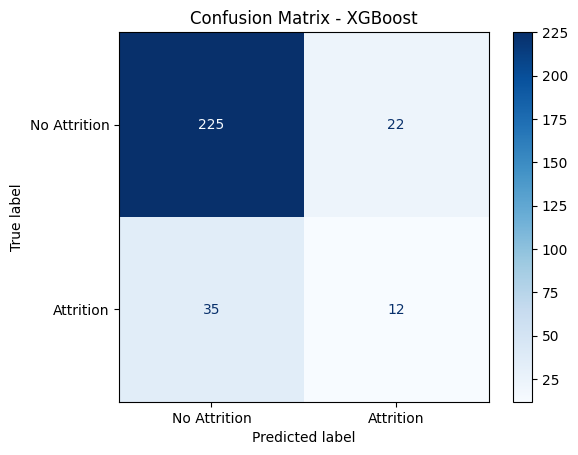

In [191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels using the trained XGBoost model
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)

# Plot confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["No Attrition", "Attrition"])
disp_xgb.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [192]:
from sklearn.metrics import roc_auc_score

auc_xgb = roc_auc_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost AUC Score: {auc_xgb:.4f}")

XGBoost AUC Score: 0.5831
